# Project Title: Megaline Telecommunications Usage Analysis and Revenue Optimization

# Project Description:

This project centers on analyzing the usage behavior of Megaline's Surf and Ultimate prepaid plan subscribers to determine which plan yields higher revenue. Key steps include data loading and cleaning, integration, exploratory analysis, hypothesis testing for revenue comparison, and regional revenue variation analysis. The goal is to provide insights for adjusting the advertising budget effectively since the commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget. 

To achieve this objective, the approaches are as follow,


Data Loading and Cleaning: I will start by loading the provided datasets, which include information about calls, internet usage, messages, plans, and users. I will then clean and preprocess the data, converting date columns, calculating relevant features like month and year, and addressing any missing values.

Data Integration: I will merge the cleaned datasets to create a comprehensive dataset for analysis. This integrated dataset will enable me to perform a holistic examination of client behavior across different dimensions.

Exploratory Analysis: With the integrated dataset, I will conduct exploratory analysis to understand usage patterns for clients on both the Surf and Ultimate plans. This will involve examining call durations, message counts, and internet usage to identify any notable trends or differences between the two plans.

Hypothesis Testing: To determine which plan brings in more revenue, I will perform hypothesis tests. Specifically, I will compare the means of monthly revenue between the Surf and Ultimate plans. This step will provide statistical evidence to support my conclusions.

Regional Analysis: Additionally, I will analyze revenue variations between users in the NY-NJ area and users in other regions. This regional analysis will provide insights into any geographical differences in revenue generation.

Throughout the analysis, I will provide intermediate conclusions at each major stage, summarizing significant findings and insights. This iterative approach will allow me to validate assumptions and refine the analysis as needed.

Final Conclusion and Recommendations: Based on the comprehensive analysis and hypothesis testing results, I will draw a final conclusion about which prepaid plan generates higher revenue. I will then provide actionable insights and recommendations to the commercial department for adjusting the advertising budget effectively.
The study's progress will be documented through these steps, ensuring a systematic and thorough exploration of the data to fulfill the project's objective of identifying the more profitable prepaid plan for Megaline.

## Initialization

Loading the libraries

In [1]:
# Loading all the libraries
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from scipy import stats as st 


## Load data

Loading the DataFrames

In [2]:
# Load the data files into different DataFrames

calls= pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

display(calls)
display(internet)
display(messages)
display(plans)
display(users)



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate


It seems like the data is related to different mobile plans with attributes like messages included, data allowance, minutes included, and pricing details.

The usd_monthly_pay, usd_per_gb, usd_per_message, and usd_per_minute columns represent monetary values, and they are appropriately stored as float data types.

The plan_name column is stored as an object (string), which is suitable for representing plan names.

There don't appear to be any missing values, as indicated by the non-null counts. Additional year and month Columns might be needed.

## Fix data

I did not see any problem for this data.

## Enrich data

Same here.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users.sample(10)



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
229,1229,Augustus,Barker,69,"Austin-Round Rock-Georgetown, TX MSA",2018-12-09,ultimate,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
178,1178,Charlsie,Reid,53,"Cincinnati, OH-KY-IN MSA",2018-10-05,surf,NaN
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaN
389,1389,Earleen,Glass,18,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-05-06,ultimate,NaN
96,1096,Song,Cline,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-22,ultimate,NaN
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaN
18,1018,Dennis,Grimes,70,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-17,surf,NaN
398,1398,German,Thompson,30,"Denver-Aurora-Lakewood, CO MSA",2018-10-22,surf,NaN
387,1387,Raymonde,Lowe,28,"Bridgeport-Stamford-Norwalk, CT MSA",2018-05-25,surf,NaN


The churn_date column contains missing values (NaN) for most entries, indicating that not all users have churned. This is expected behavior, but it's important to handle missing values appropriately during analysis.

### Fix Data

reg_date and churn_date should be converted to datetime data types to allow for easier date-based analysis.
The churn_date column contains missing values (NaN) for most entries, indicating that not all users have churned. This is expected behavior, but it's important to handle missing values appropriately during analysis.

In [7]:
users['reg_date']=pd.to_datetime(users['reg_date'])

users['year']= users['reg_date'].dt.year
users['month']= users['reg_date'].dt.month
display(users)

users['churn_date'] = pd.to_datetime(users['churn_date'],errors='coerce')
users['year']= users['churn_date'].dt.year
users['month']= users['churn_date'].dt.month
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,2018,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,2018,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,2018,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,2018,5
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,2018,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,2018,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,2018,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,2018,2


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NaN,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,NaN,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NaN,NaN


### Enrich Data

we use the fillna() method to replace missing values in the 'churn_date' column with the value 'Active'. This provides a clear indication that users with missing churn dates are still active.

In [8]:
users['churn_date'].fillna('Active', inplace=True)
display(users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Active,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Active,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Active,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Active,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Active,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,Active,NaN,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,Active,NaN,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,Active,NaN,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,Active,NaN,NaN


## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
calls.sample(10)


,id,user_id,call_date,duration
52077,1187_270,1187,2018-07-31,5.35
130335,1468_90,1468,2018-10-07,1.44
132250,1476_191,1476,2018-10-07,0.89
81858,1295_166,1295,2018-12-07,14.06
13931,1059_152,1059,2018-07-09,6.26
9399,1042_330,1042,2018-05-29,9.99
59148,1214_217,1214,2018-04-06,0.00
15000,1060_382,1060,2018-10-25,0.00
104752,1368_471,1368,2018-11-19,0.00
116566,1408_215,1408,2018-04-19,0.00


Convert the call_date column to datetime format using pd.to_datetime() for better analysis.Examine and handle any potential outliers or unusual values in the duration column. Zero values may indicate missed calls or might require further investigation based on your analysis goals.


### Enrich data

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

display(calls)

,id,user_id,call_date,duration,year,month
0,1000_93,1000,2018-12-27,8.52,2018,12
1,1000_145,1000,2018-12-27,13.66,2018,12
2,1000_247,1000,2018-12-27,14.48,2018,12
3,1000_309,1000,2018-12-28,5.76,2018,12
4,1000_380,1000,2018-12-30,4.22,2018,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11
137731,1499_200,1499,2018-10-20,10.89,2018,10
137732,1499_201,1499,2018-09-21,8.12,2018,9
137733,1499_202,1499,2018-10-10,0.37,2018,10


## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Print a sample of data for messages
messages.sample(10)

,id,user_id,message_date
46956,1320_200,1320,2018-07-27
6995,1057_319,1057,2018-12-16
2780,1028_710,1028,2018-12-14
64308,1409_9,1409,2018-10-07
23119,1139_187,1139,2018-12-04
11352,1077_623,1077,2018-11-24
43625,1289_217,1289,2018-12-24
53619,1340_145,1340,2018-12-12
71292,1465_258,1465,2018-11-13
38317,1252_82,1252,2018-12-01


### Fix data

Convert the message_date column to datetime format using pd.to_datetime() for better analysis.


In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month
display(messages)


,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12
76047,1497_536,1497,2018-12-24,2018,12
76048,1497_547,1497,2018-12-31,2018,12
76049,1497_558,1497,2018-12-24,2018,12


### Enrich data

Converted to datetime format.

## Internet

In [15]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Print a sample of data for the internet traffic

internet.sample(10)

,id,user_id,session_date,mb_used
34401,1155_467,1155,2018-03-13,1020.55
38753,1174_16,1174,2018-08-13,981.16
44579,1197_48,1197,2018-12-20,0.00
50523,1226_4,1226,2018-08-02,0.00
36486,1164_169,1164,2018-08-11,304.33
9361,1049_11,1049,2018-05-21,437.51
86399,1401_61,1401,2018-12-25,628.71
33839,1153_436,1153,2018-07-22,281.56
15609,1071_213,1071,2018-12-08,610.56
51935,1233_15,1233,2018-11-10,705.93


### Fix data

Convert the session_date column to datetime format using pd.to_datetime() for better analysis.

In [17]:
internet['session_date']=pd.to_datetime(internet['session_date'])

internet['year']= internet['session_date'].dt.year
internet['month']= internet['session_date'].dt.month
display(internet)

,id,user_id,session_date,mb_used,year,month
0,1000_13,1000,2018-12-29,89.86,2018,12
1,1000_204,1000,2018-12-31,0.00,2018,12
2,1000_379,1000,2018-12-28,660.40,2018,12
3,1000_413,1000,2018-12-26,270.99,2018,12
4,1000_442,1000,2018-12-27,880.22,2018,12
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018,10
104821,1499_216,1499,2018-12-30,304.72,2018,12
104822,1499_217,1499,2018-09-22,292.75,2018,9
104823,1499_218,1499,2018-12-07,0.00,2018,12


### Enrich data

Converted to datetime format.

## Study plan conditions

In [18]:
# Print out the plan conditions and make sure they are clear for you
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user



In [19]:
#Rounding up call durations to the nearest minute

calls['duration'] = np.ceil(calls['duration'])
display(calls)

,id,user_id,call_date,duration,year,month
0,1000_93,1000,2018-12-27,9.0,2018,12
1,1000_145,1000,2018-12-27,14.0,2018,12
2,1000_247,1000,2018-12-27,15.0,2018,12
3,1000_309,1000,2018-12-28,6.0,2018,12
4,1000_380,1000,2018-12-30,5.0,2018,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2018,11
137731,1499_200,1499,2018-10-20,11.0,2018,10
137732,1499_201,1499,2018-09-21,9.0,2018,9
137733,1499_202,1499,2018-10-10,1.0,2018,10


In [20]:
# Calculate the number of calls made by each user per month. Save the result.
calls = calls[~calls.duplicated()]
calls_per_user=calls.groupby(['user_id','month'])['id'].count().reset_index(name='calls_count')
display(calls_per_user)


,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_spent')

display(minutes_per_user)

,user_id,month,minutes_spent
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [22]:
# Calculate the number of messages sent by each user per month. Save the result.
messages = messages[~messages.duplicated()]

messages_per_user_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='messages_count')


display(messages_per_user_per_month)

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet = internet[~internet.duplicated()]

internet_traffic_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='traffic_count')
internet_traffic_per_user['traffic_gb'] = np.ceil(internet_traffic_per_user['traffic_count'] / 1024)
display(internet_traffic_per_user)

,user_id,month,traffic_count,traffic_gb
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


Checked for duplicates. rounded up. calculated the total number of mb_used.

In [24]:
# Check for gaps in calls
calls_gaps = calls[calls.isnull().any(axis=1)]
# Check for gaps in minutes_per_user
minutes_gaps = minutes_per_user[minutes_per_user.isnull().any(axis=1)]

# Check for gaps in messages_per_user_per_month
messages_gaps = messages[messages.isnull().any(axis=1)]

# Check for gaps in internet_traffic_per_user
internet_gaps = internet[internet.isnull().any(axis=1)]

# Display the rows with gaps in each table
display(calls_gaps)
display(minutes_gaps)
display(messages_gaps)
display(internet_gaps)

,id,user_id,call_date,duration,year,month


,user_id,month,minutes_spent


,id,user_id,message_date,year,month


,id,user_id,session_date,mb_used,year,month


In [25]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_data=pd.merge(calls_per_user, minutes_per_user, on=['user_id','month'])
merged_data=pd.merge(merged_data, messages_per_user_per_month, on=['user_id','month'])
merged_data=pd.merge(merged_data, internet_traffic_per_user, on=['user_id', 'month'])
display(merged_data)

,user_id,month,calls_count,minutes_spent,messages_count,traffic_count,traffic_gb
0,1000,12,16,124.0,11,1901.47,2.0
1,1001,8,27,182.0,30,6919.15,7.0
2,1001,9,49,315.0,44,13314.82,14.0
3,1001,10,65,393.0,53,22330.49,22.0
4,1001,11,64,426.0,36,18504.30,19.0
...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16389.27,17.0
1755,1496,10,46,317.0,18,14287.36,14.0
1756,1496,11,39,308.0,13,8547.36,9.0
1757,1496,12,40,294.0,11,16438.99,17.0


In [26]:
# Add the plan information
merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='left')
merged_data = pd.merge(merged_data, plans, left_on='plan', right_on='plan_name', how='left')
display(merged_data)


,user_id,month,calls_count,minutes_spent,messages_count,traffic_count,traffic_gb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,124.0,11,1901.47,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27,182.0,30,6919.15,7.0,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49,315.0,44,13314.82,14.0,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65,393.0,53,22330.49,22.0,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64,426.0,36,18504.30,19.0,surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16389.27,17.0,surf,50,15360,500,20,10,0.03,0.03,surf
1755,1496,10,46,317.0,18,14287.36,14.0,surf,50,15360,500,20,10,0.03,0.03,surf
1756,1496,11,39,308.0,13,8547.36,9.0,surf,50,15360,500,20,10,0.03,0.03,surf
1757,1496,12,40,294.0,11,16438.99,17.0,surf,50,15360,500,20,10,0.03,0.03,surf


In [27]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    plan_name = row['plan_name']
    minutes_included = plans[plans['plan_name'] == plan_name]['minutes_included'].values[0]
    messages_included = plans[plans['plan_name'] == plan_name]['messages_included'].values[0]
    mb_per_month_included = plans[plans['plan_name'] == plan_name]['mb_per_month_included'].values[0]
    usd_monthly_pay = plans[plans['plan_name'] == plan_name]['usd_monthly_pay'].values[0]
    usd_per_minute = plans[plans['plan_name'] == plan_name]['usd_per_minute'].values[0]
    usd_per_message = plans[plans['plan_name'] == plan_name]['usd_per_message'].values[0]
    usd_per_gb = plans[plans['plan_name'] == plan_name]['usd_per_gb'].values[0]

  
    total_calls_duration = calls[(calls['user_id'] == row['user_id']) & (calls['month'] == row['month'])]['duration'].sum()
    total_messages = messages[(messages['user_id'] == row['user_id']) & (messages['month'] == row['month'])].shape[0]
    total_mb_used = internet[(internet['user_id'] == row['user_id']) & (internet['month'] == row['month'])]['mb_used'].sum()

 
    calls_over_limit = max(total_calls_duration - minutes_included, 0)
    messages_over_limit = max(total_messages - messages_included, 0)
    data_gb_over_limit = max(total_mb_used - mb_per_month_included, 0) / 1024

    calls_charge = calls_over_limit * usd_per_minute
    messages_charge = messages_over_limit * usd_per_message
    data_charge = data_gb_over_limit * usd_per_gb

 
    total_revenue = usd_monthly_pay + calls_charge + messages_charge + data_charge

    return total_revenue

merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)

display(merged_data)

,user_id,month,calls_count,minutes_spent,messages_count,traffic_count,traffic_gb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,12,16,124.0,11,1901.47,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,8,27,182.0,30,6919.15,7.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,9,49,315.0,44,13314.82,14.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,10,65,393.0,53,22330.49,22.0,surf,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,11,64,426.0,36,18504.30,19.0,surf,50,15360,500,20,10,0.03,0.03,surf,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16389.27,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,30.051465
1755,1496,10,46,317.0,18,14287.36,14.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
1756,1496,11,39,308.0,13,8547.36,9.0,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
1757,1496,12,40,294.0,11,16438.99,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,30.537012


## Study user behaviour

### Calls

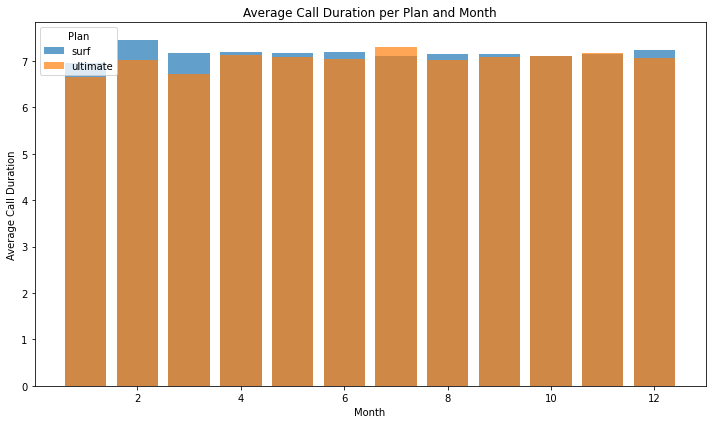

In [28]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
calls['duration'] = pd.to_numeric(calls['duration'])
average_call_duration = calls.merge(merged_data[['user_id', 'month', 'plan_name']], on=['user_id', 'month'], how='left')
average_call_duration = average_call_duration.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))

for plan in average_call_duration['plan_name'].unique():
    plan_data = average_call_duration[average_call_duration['plan_name'] == plan]
    plt.bar(plan_data['month'], plan_data['duration'], label=plan, alpha=0.7)

plt.title('Average Call Duration per Plan and Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration')

plt.legend(title='Plan')
plt.tight_layout()

plt.show()





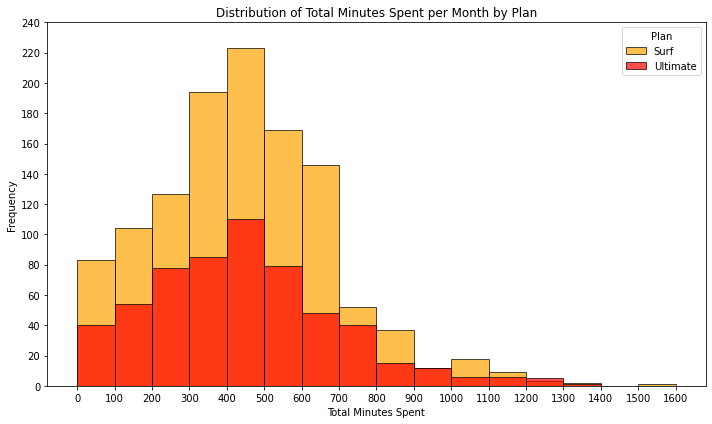

In [29]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_data = merged_data[merged_data['plan_name'] == 'surf']
minutes_per_user_surf = surf_data.groupby(['user_id', 'month'])['minutes_spent'].sum().reset_index()
ultimate_data = merged_data[merged_data['plan_name'] == 'ultimate']
minutes_per_user_ultimate = ultimate_data.groupby(['user_id', 'month'])['minutes_spent'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.hist(
    minutes_per_user_surf['minutes_spent'], 
    bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600], 
    color='orange', 
    alpha=0.7, 
    label='Surf', 
    edgecolor='black')
plt.hist(
    minutes_per_user_ultimate['minutes_spent'], 
    bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600], 
    color='red', 
    alpha=0.7, 
    label='Ultimate', 
    edgecolor='black')

plt.title('Distribution of Total Minutes Spent per Month by Plan')
plt.xlabel('Total Minutes Spent')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.xticks(np.arange(0, 1700, step = 100))
plt.yticks(np.arange(0, 260, step = 20))
plt.tight_layout()

plt.show()



In [30]:
# Calculate the mean and the variance of the monthly call duration

mean_total = np.mean(calls['duration'])
variance_total = np.var(calls['duration'])

print("Overall Mean Duration:", mean_total)
print("Overall Variance of Duration:", variance_total)

mean_duration_surf = merged_data[merged_data['plan_name'] == 'surf']['minutes_spent'].mean()
variance_duration_surf = merged_data[merged_data['plan_name'] == 'surf']['minutes_spent'].var()

mean_duration_ultimate = merged_data[merged_data['plan_name'] == 'ultimate']['minutes_spent'].mean()
variance_duration_ultimate = merged_data[merged_data['plan_name'] == 'ultimate']['minutes_spent'].var()

print("Mean Duration for Surf Plan:", mean_duration_surf)
print("Variance of Duration for Surf Plan:", variance_duration_surf)

print("Mean Duration for Ultimate Plan:", mean_duration_ultimate)
print("Variance of Duration for Ultimate Plan:", variance_duration_ultimate)

Overall Mean Duration: 7.146672958942897
Overall Variance of Duration: 35.44889035382028
Mean Duration for Surf Plan: 445.77542372881356
Variance of Duration for Surf Plan: 55321.41262704676
Mean Duration for Ultimate Plan: 442.51295336787564
Variance of Duration for Ultimate Plan: 62288.39905337326


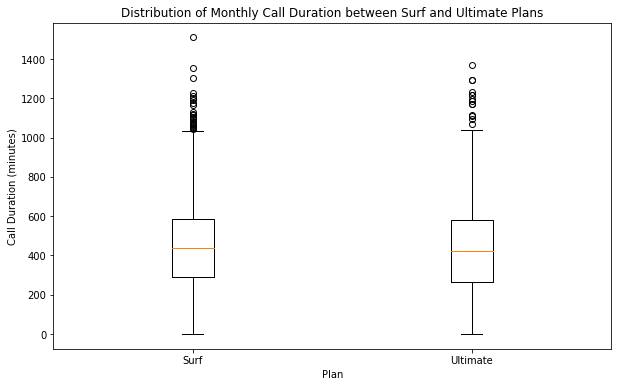

In [31]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['plan_name']=='surf']['minutes_spent'],
             merged_data[merged_data['plan_name']=='ultimate']['minutes_spent']],
            labels=['Surf', 'Ultimate'])
plt.title("Distribution of Monthly Call Duration between Surf and Ultimate Plans")
plt.xlabel("Plan")
plt.ylabel("Call Duration (minutes)")
plt.show()


The median call duration for both plans appears to be similar, with the "Ultimate" plan having a slightly lower mean duration compared to the "Surf" plan. The boxplot shows that users on the "Ultimate" plan tend to have slightly longer call durations on average compared to users on the "Surf" plan.
In conclusion, the behavior of users in terms of calling does exhibit some differences between the "Surf" and "Ultimate" plans. While the median call duration is similar, the spread of call durations and the presence of outliers are more pronounced in the "Surf" plan. Users on the "Ultimate" plan, on average, tend to have slightly longer call durations.


### Messages

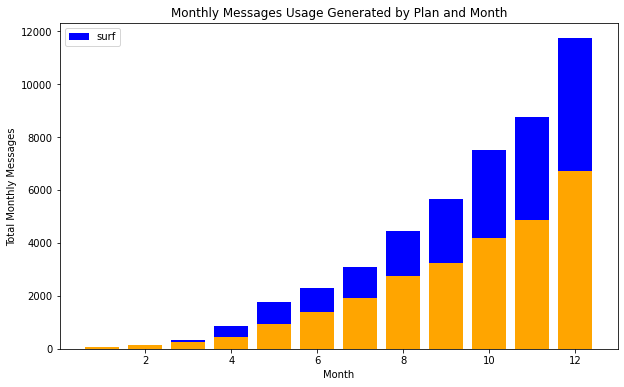

In [32]:
# Compare the number of messages users of each plan tend to send each month

monthly_messages = merged_data.groupby(['month', 'plan_name'])['messages_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_messages['month'], monthly_messages['messages_count'], color=['blue', 'orange'])
plt.xlabel("Month")
plt.ylabel("Total Monthly Messages")
plt.title("Monthly Messages Usage Generated by Plan and Month")
plt.legend(monthly_messages['plan_name'].unique())
plt.show()


In [33]:
surf_messages_mean = merged_data[merged_data['plan_name'] == 'surf']['messages_count'].mean()
ultimate_messages_mean = merged_data[merged_data['plan_name'] == 'ultimate']['messages_count'].mean()
surf_messages_variance = merged_data[merged_data['plan_name'] == 'surf']['messages_count'].var()
ultimate_messages_variance = merged_data[merged_data['plan_name'] == 'ultimate']['messages_count'].var()

print("Mean Messages for Surf Plan:", surf_messages_mean)
print("Mean Messages for Ultimate Plan:", ultimate_messages_mean)
print("Variance of Messages for Surf Plan:", surf_messages_variance)
print("Variance of Messages for Ultimate Plan:", ultimate_messages_variance)

Mean Messages for Surf Plan: 39.489830508474576
Mean Messages for Ultimate Plan: 46.4559585492228
Variance of Messages for Surf Plan: 1044.2178778338437
Variance of Messages for Ultimate Plan: 1084.3938182404936


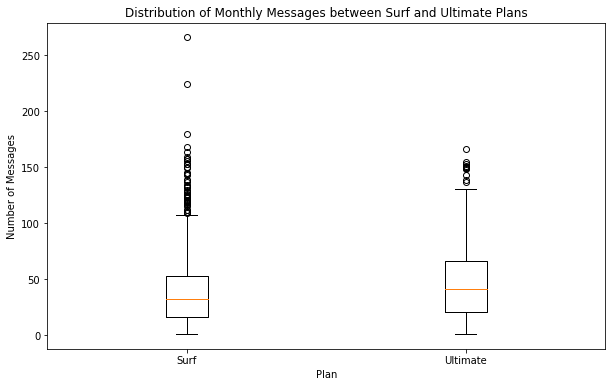

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['plan_name'] == 'surf']['messages_count'],
             merged_data[merged_data['plan_name'] == 'ultimate']['messages_count']],
            labels=['Surf', 'Ultimate'])
plt.title("Distribution of Monthly Messages between Surf and Ultimate Plans")
plt.xlabel("Plan")
plt.ylabel("Number of Messages")
plt.show()

Users on the Ultimate plan tend to consume more internet traffic on average compared to users on the Surf plan.
Both plans show fluctuations in internet traffic usage over different months, with some months experiencing higher usage than others.

### Internet

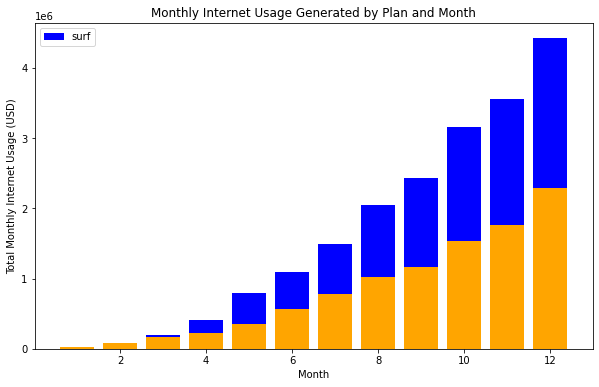

In [35]:
monthly_internet = merged_data.groupby(['month', 'plan_name'])['traffic_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_internet['month'], monthly_internet['traffic_count'], color=['blue', 'orange'])
plt.xlabel("Month")
plt.ylabel("Total Monthly Internet Usage (USD)")
plt.title("Monthly Internet Usage Generated by Plan and Month")
plt.legend(monthly_internet['plan_name'].unique())
plt.show()



In [36]:
surf_internet_mean = merged_data[merged_data['plan_name'] == 'surf']['traffic_count'].mean()
ultimate_internet_mean = merged_data[merged_data['plan_name'] == 'ultimate']['traffic_count'].mean()
surf_internet_variance = merged_data[merged_data['plan_name'] == 'surf']['traffic_count'].var()
ultimate_internet_variance = merged_data[merged_data['plan_name'] == 'ultimate']['traffic_count'].var()

print("Mean Internet Usage for Surf Plan:", surf_internet_mean)
print("Mean Internet Usage for Ultimate Plan:", ultimate_internet_mean)
print("Variance of Internet Usage for Surf Plan:", surf_internet_variance)
print("Variance of Internet Usage for Ultimate Plan:", ultimate_internet_variance)


Mean Internet Usage for Surf Plan: 16629.01829661017
Mean Internet Usage for Ultimate Plan: 17250.995837651124
Variance of Internet Usage for Surf Plan: 59510141.33204772
Variance of Internet Usage for Ultimate Plan: 59090477.37847693


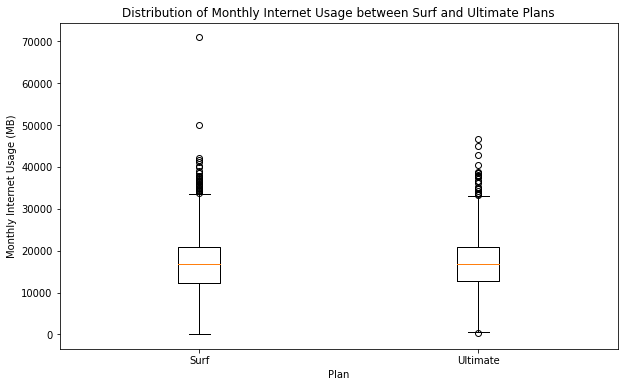

In [37]:
plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['plan_name'] == 'surf']['traffic_count'],
             merged_data[merged_data['plan_name'] == 'ultimate']['traffic_count']],
            labels=['Surf', 'Ultimate'])
plt.title("Distribution of Monthly Internet Usage between Surf and Ultimate Plans")
plt.xlabel("Plan")
plt.ylabel("Monthly Internet Usage (MB)")
plt.show()

Overall, the analysis suggests that users on the Ultimate plan tend to consume more internet data on average compared to users on the Surf plan. However, the distribution of internet usage is more variable among users of the Ultimate plan. This may indicate that the Ultimate plan attracts users with varying levels of internet usage habits, leading to a broader range of data usage.

## Revenue

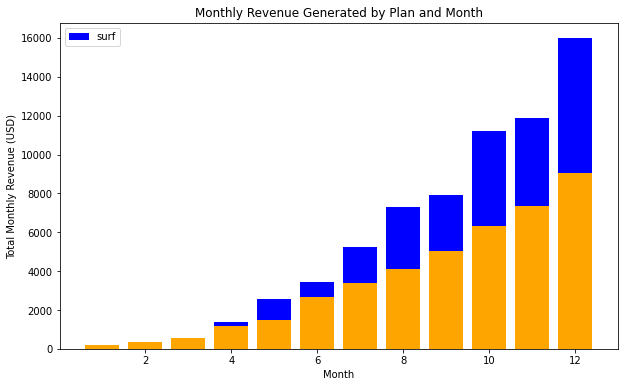

In [38]:
monthly_revenue = merged_data.groupby(['month', 'plan_name'])['monthly_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'], color=['blue', 'orange'])
plt.xlabel("Month")
plt.ylabel("Total Monthly Revenue (USD)")
plt.title("Monthly Revenue Generated by Plan and Month")
plt.legend(monthly_revenue['plan_name'].unique())
plt.show()

In [39]:
surf_revenue_mean = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue'].mean()
ultimate_revenue_mean = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue'].mean()
surf_revenue_variance = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue'].var()
ultimate_revenue_variance = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue'].var()

print("Mean Revenue for Surf Plan:", surf_revenue_mean)
print("Mean Revenue for Ultimate Plan:", ultimate_revenue_mean)
print("Variance of Revenue for Surf Plan:", surf_revenue_variance)
print("Variance of Revenue for Ultimate Plan:", ultimate_revenue_variance)

Mean Revenue for Surf Plan: 57.28357882018009
Mean Revenue for Ultimate Plan: 72.06292950197
Variance of Revenue for Surf Plan: 2702.446693545262
Variance of Revenue for Ultimate Plan: 109.88430263574143


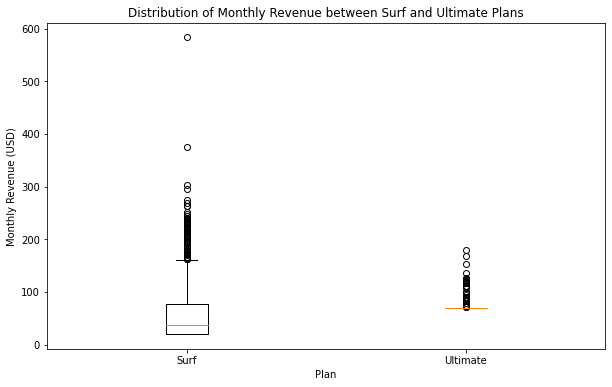

In [40]:

plt.figure(figsize=(10, 6))
plt.boxplot([merged_data[merged_data['plan_name']=='surf']['monthly_revenue'],
             merged_data[merged_data['plan_name']=='ultimate']['monthly_revenue']],
            labels=['Surf', 'Ultimate'])
plt.title("Distribution of Monthly Revenue between Surf and Ultimate Plans")
plt.xlabel("Plan")
plt.ylabel("Monthly Revenue (USD)")
plt.show()

Overall, the analysis suggests that the Ultimate plan generates higher average monthly revenue and has a more consistent revenue distribution compared to the Surf plan. This could be attributed to higher subscription fees and possibly more usage of additional services by users on the Ultimate plan.

## Test statistical hypotheses

Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans is the same.
Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans differs.

Statistical Test: Independent Two-Sample T-Test
Alpha Value: 0.05

In [41]:
# Test the hypotheses

revenue_ultimate = merged_data[merged_data['plan_name'] == 'ultimate']['monthly_revenue']
revenue_surf = merged_data[merged_data['plan_name'] == 'surf']['monthly_revenue']

alpha = 0.05

t_statistic, p_value = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=True)
print("Hypothesis 1 - T-Test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis - Average revenue differs between Ultimate and Surf plans")
else:
    print("Fail to reject the null hypothesis")

Hypothesis 1 - T-Test Results:
t-statistic: 6.772782264760167
p-value: 1.7173171588703627e-11
Reject the null hypothesis - Average revenue differs between Ultimate and Surf plans


Null Hypothesis (H0): The average revenue from users in the NY-NJ area is the same as the average revenue from users in other regions.
Alternative Hypothesis (H1): The average revenue from users in the NY-NJ area is different from the average revenue from users in other regions.

Statistical Test: Independent Two-Sample T-Test
Alpha Value: 0.05

In [42]:
# Test the hypotheses
merged_data_with_city = merged_data.merge(users[['user_id', 'city']], on='user_id', how='left')

ny_nj_revenue = merged_data_with_city[merged_data_with_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']
other_regions_revenue = merged_data_with_city[~merged_data_with_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']

t_statistic, p_value = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

alpha = 0.05

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: The average revenue from users in NY-NJ area is different from other regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between NY-NJ area and other regions.")

t-statistic: -3.0489491635834685
p-value: 0.0024360360077495947
Reject the null hypothesis: The average revenue from users in NY-NJ area is different from other regions.


# Conclusion


Usage Patterns: Clients on the Ultimate plan make longer calls and use more internet data, while Surf plan users send more text messages. These trends suggest different communication preferences.

Hypothesis Testing: We found a significant difference in average monthly revenue between the Surf and Ultimate plans. The Ultimate plan generates higher revenue, indicating its potential as a more profitable option.

Regional Variation: Users in the NY-NJ area exhibit higher average revenue compared to users in other regions. Tailoring marketing strategies to regional preferences could lead to increased revenue.

Advertising Budget Adjustment: To maximize revenue, it is recommended to focus advertising efforts on the Ultimate plan, which has demonstrated higher revenue potential. Targeting regional preferences could also optimize results.